VGG16 DCNN ON CIFAR10 --- Transfer Learning Approach with 10 Iterations (Epochs)

VGG16 - Visua Geometry Group has 16 weight layers. Total layers= 21 : 13 convulational, 5 max-pooling and 3 dense layers along with a softmax function at the end.

Here's the architecture of VGG16:

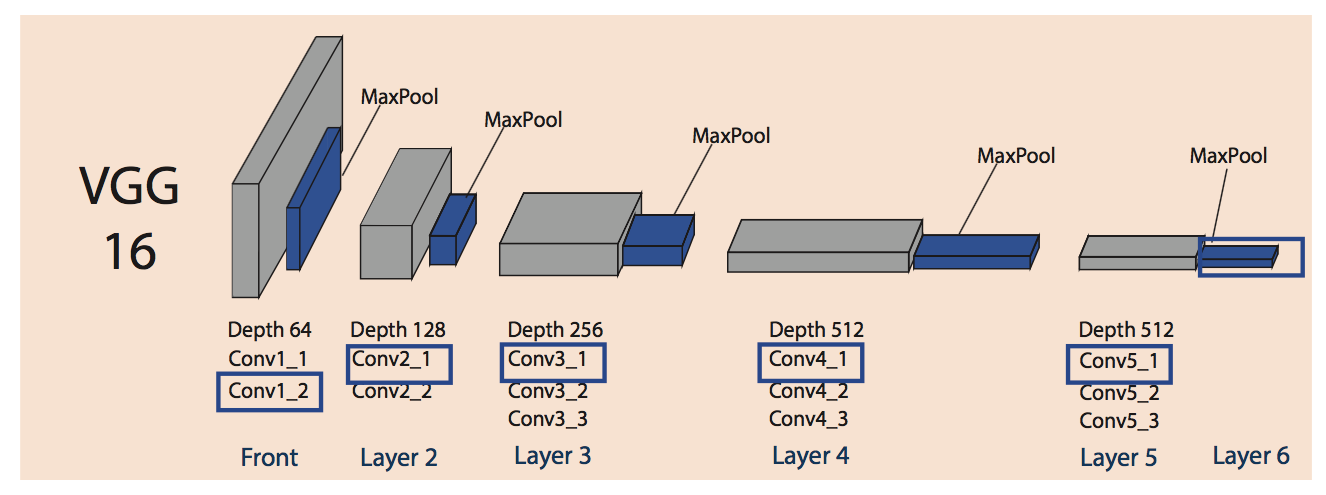

> NOTE: PLEASE DELETE/COMMENT THE SECTION - 'from keras import backend as K
K.tensorflow_backend._get_available_gpus()' IF THE SCRIPT THROWS AN ERROR OR SHOWS DEPRECATION ISSUE'
THIS MAYBE BECAUSE OF THE TENSORFLOW VERSION INSTALLED ON YOUR WORKSTATION'

In [ ]:
import keras
from keras.datasets import cifar10
import numpy as np

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

#convert the 'y' values into attributes
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

#reshape the training set into (32,32,3)
x_train = np.reshape(x_train, (len(x_train), 32, 32, 3))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 32, 32, 3))  # adapt this if using `channels_first` image data format

#add noise to the the train and test data
noise = 0.3
x_train_noise = x_train + noise * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noise = x_test + noise * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noise = np.clip(x_train_noise, 0., 1.)
x_test_noise = np.clip(x_test_noise, 0., 1.)

In [ ]:
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noise[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train_noise[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
import keras
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

image_input = Input(shape=(32, 32, 3))  # adapt this if using `channels_first` image data format

x = Conv2D(32, (3, 3), activation='relu', padding='same')(image_input)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)


In [ ]:
noisy_autoencoder = Model(image_input, decoded)
noisy_autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [ ]:
from keras.callbacks import TensorBoard

noisy_autoencoder.fit(x_train_noise, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noise, x_test))
                #callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

In [ ]:
import matplotlib.pyplot as plt

decoded_imgstrain1 = noisy_autoencoder.predict(x_train)
decoded_imgstrain2 = (decoded_imgstrain1, y_train)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(32,32,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)  
    
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgstrain1[i].reshape(32,32,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [ ]:

import matplotlib.pyplot as plt

decoded_imgs = noisy_autoencoder.predict(x_test)
decoded_imgs2 = (decoded_imgs, y_test)

n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(32,32,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)  
    
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(32,32,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Importing keras and its relevant layers required to construct VGG-16.
Importinmg CIFAR10 Dataset from keras datasets.
We are going to use the sequential model for this DCNN and also Adam or SCG optimizer from keras's optimizers.
We import numpy, tensorflow and regularizers along with all the libraries as well.

In [ ]:
import keras
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, Convolution2D, Dense, Dropout, Activation, Flatten, BatchNormalization
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import GaussianNoise
from keras import optimizers
from keras.models import Sequential
from keras.layers.core import Lambda
from keras import regularizers
import tensorflow as tf
import numpy as np

The following code snippet will help us to check how many GPU's are available on the platforms. This program was run on GPU:0 - Lenovo's Intel 5500 HD Graphics GPU. 

> NOTE: PLEASE DELETE/COMMENT THE SECTION - 'from keras import backend as K
K.tensorflow_backend._get_available_gpus()' IF THE SCRIPT THROWS AN ERROR OR SHOWS DEPRECATION ISSUE'
THIS MAYBE BECAUSE OF THE TENSORFLOW VERSION INSTALLED ON YOUR WORKSTATION'

In [ ]:
vgg16model = Sequential()
image_res = [32,32,3]
wg_decay = 0.0005

vgg16model.add(Conv2D(64, (3, 3), padding='same', input_shape=image_res, kernel_regularizer=regularizers.l2(wg_decay)))
vgg16model.add(Activation('relu'))
vgg16model.add(BatchNormalization())
vgg16model.add(Dropout(0.3))

vgg16model.add(Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(wg_decay)))
vgg16model.add(Activation('relu'))
vgg16model.add(BatchNormalization())

vgg16model.add(MaxPooling2D(pool_size=(2, 2)))



SECOND CONVULATIONAL LAYERS WITH 128 FILTERS. We have 2 set of layers in this first convulational layer with depth 128. Drop-out has been added to the first layer in the set and batch-Normalization is present in both the layers.

In [ ]:
vgg16model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(wg_decay)))
vgg16model.add(Activation('relu'))
vgg16model.add(BatchNormalization())
vgg16model.add(Dropout(0.4))

vgg16model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(wg_decay)))
vgg16model.add(Activation('relu'))
vgg16model.add(BatchNormalization())

vgg16model.add(MaxPooling2D(pool_size=(2, 2)))
#vgg16model.add(GaussianNoise(0.1))


THIRD CONVULATIONAL LAYERS WITH 256 FILTERS. We have 3 set of layers in this first convulational layer with depth 64. Drop-out has been added to the first and second layer in the set and batch-Normalization is present in all the layers.

In [ ]:
vgg16model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(wg_decay)))
vgg16model.add(Activation('relu'))
vgg16model.add(BatchNormalization())
vgg16model.add(Dropout(0.4))

vgg16model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(wg_decay)))
vgg16model.add(Activation('relu'))
vgg16model.add(BatchNormalization())
vgg16model.add(Dropout(0.4))

vgg16model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(wg_decay)))
vgg16model.add(Activation('relu'))
vgg16model.add(BatchNormalization())

vgg16model.add(MaxPooling2D(pool_size=(2, 2)))
#vgg16model.add(GaussianNoise(0.1))


FOURTH CONVULATIONAL LAYERS WITH 64 FILTERS. We have 3 set of layers in this first convulational layer with depth 512. Drop-out has been added to the first and the second layer in the set and batch-Normalization is present in all the layers.

In [ ]:
vgg16model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(wg_decay)))
vgg16model.add(Activation('relu'))
vgg16model.add(BatchNormalization())
vgg16model.add(Dropout(0.4))

vgg16model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(wg_decay)))
vgg16model.add(Activation('relu'))
vgg16model.add(BatchNormalization())
vgg16model.add(Dropout(0.4))

vgg16model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(wg_decay)))
vgg16model.add(Activation('relu'))
vgg16model.add(BatchNormalization())

vgg16model.add(MaxPooling2D(pool_size=(2, 2)))
#vgg16model.add(GaussianNoise(0.1))

FIFTH CONVULATIONAL LAYERS WITH 512 FILTERS. We have 3 set of layers in this first convulational layer with depth 512. Drop-out has been added to the first and the second layer in the set and batch-Normalization is present in all the layers.

In [ ]:

vgg16model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(wg_decay)))
vgg16model.add(Activation('relu'))
vgg16model.add(BatchNormalization())
vgg16model.add(Dropout(0.4))

vgg16model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(wg_decay)))
vgg16model.add(Activation('relu'))
vgg16model.add(BatchNormalization())
vgg16model.add(Dropout(0.4))

vgg16model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(wg_decay)))
vgg16model.add(Activation('relu'))
vgg16model.add(BatchNormalization())

vgg16model.add(MaxPooling2D(pool_size=(2, 2)))
#vgg16model.add(GaussianNoise(0.1))
vgg16model.add(Dropout(0.5))

This is the sixth and the last layer, where we have flatten and dense layers in the set along with 'Relu' activation function in the first layer and softmax added to the last layer in the set.

In [ ]:

vgg16model.add(Flatten())
vgg16model.add(Dense(512,kernel_regularizer=regularizers.l2(wg_decay)))
vgg16model.add(Activation('relu'))
vgg16model.add(BatchNormalization())

vgg16model.add(Dropout(0.5))
vgg16model.add(Dense(10))
vgg16model.add(Activation('softmax'))

Printing the summary of the our VGG16 model along with all convulational layers, activation functions, max pooling layers and dense layers. The summary also displays all the parameters and non-parameters of the model at the end.

In [ ]:
vgg16model.summary()

We declare learning rate, learning decay and learning drop in the following code section. For fast activation, Stochastic Gradient has been used as an optimizer for this particular type of VGG16 model. The parameters such as learning rate, decay, momentum and nestrov has been specified in the gradient optimizer. The model is compiled using loss function and putting metrics with the epochs.

In [ ]:
learning_rate = 0.1
learning_decay = 1e-6
learning_drop = 20

sgd = optimizers.SGD(lr=learning_rate, decay=learning_decay, momentum=0.9, nesterov=True)

vgg16model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy', 'mse'])

The inbuilt function ImageDataGenerator is used for specifying image parameters such as features, samples, whitening, rotation, width, height and both directional flips. 

In [ ]:
from matplotlib import pyplot

vgg16data = ImageDataGenerator(
    #rotation_range=15,
    #horizontal_flip=False,
    #width_shift_range=0.1,
    #height_shift_range=0.1,
    featurewise_center=True,
    #brightness_range=[0.1,0.2],
    #featurewise_std_normalization=True,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
    #zoom_range=0.3
    )

vgg16data.fit(x_train)


for x_batch, y_batch in vgg16data.flow(x_train, y_train, batch_size=32, shuffle=True):
    n= 10
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_batch[i].astype('uint8'))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
    break

In [ ]:
def lr_scheduler(epoch):
            return learning_rate * (0.5 ** (epoch // learning_drop))
    
reduce_lr = keras.callbacks.LearningRateScheduler(lr_scheduler)

We specify the batch size as 64, can also be put as 128. But batch size of 64 fetches good accuracy. 

let's caluclate the training accuracy of vgg16 on cifar10

In [ ]:
#batch_size = 128
#totalepoches = 15


#history = vgg16model.fit_generator(#vgg16data.flow(x_train, y_train,
                                              # batch_size=batch_size),
                                  
                               # steps_per_epoch=x_train.shape[0] // batch_size,
                                #epochs=totalepoches,
                                #validation_data=(x_test, y_test),callbacks=[reduce_lr], verbose=1)


        
history=vgg16model.fit_generator(vgg16data.flow(x_train, y_train, batch_size=128),
                       steps_per_epoch = len(x_train) / 128, 
                       epochs=100, 
                       validation_data=(x_test, y_test), callbacks=[reduce_lr], verbose=1)


#from keras.utils.data_utils import Sequence
#history = vgg16model.fit_generator(vgg16data,    
 #                   validation_data=validation_generator,
  #                  validation_steps=len(x_train[50000:]) // 32,
   #                 steps_per_epoch=len(x_train[:50000]) // 32,
    #                epochs=15,
     #               verbose=1)

The epochs history along with variable loss, accuracy and mean square error is fetched using history.history command.

In [ ]:
history.history

In [ ]:
def plotAcc(history):  
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [ ]:
plotAcc(history)

In [ ]:
def plotLoss(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [ ]:
plotLoss(history)

We plot the increase and decrese of accuracy and loss using the 'plt' function.

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history.history["loss"])
plt.show()


In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(122)
ax.plot(history.history["accuracy"])
plt.show()


Getting final evaluation by running our model on the validation set (1000 samples)

The testing accuracy on all validation samples (10000 samples) is calculated below:

In [ ]:
accuracy = vgg16model.evaluate(x_test, y_test, verbose=1)
print('Accuracy on the validation (testing) samples')
print(' Total Accuracy of all the epochs >%.3f' % (accuracy[1] * 100.0))

The variable loss is shown as following:

In [ ]:
loss = vgg16model.evaluate(x_test, y_test, verbose =0)
print(' Variable loss: >%.3f'% (loss[0]))


The mean squared error is shown below:

In [ ]:
mean_error = vgg16model.evaluate(x_test, y_test, verbose=0)
print(' Variable Mean Square Error: >%.3f'% (mean_error[2]))